In [1]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
digits = load_digits()

In [3]:
d = digits.images

In [4]:
# normalize image
d = d/255

In [5]:
t = digits.target

In [6]:
print(d.shape, '\n', d.dtype,'\n', d)

(1797, 8, 8) 
 float64 
 [[[0.         0.         0.01960784 ... 0.00392157 0.         0.        ]
  [0.         0.         0.05098039 ... 0.05882353 0.01960784 0.        ]
  [0.         0.01176471 0.05882353 ... 0.04313725 0.03137255 0.        ]
  ...
  [0.         0.01568627 0.04313725 ... 0.04705882 0.02745098 0.        ]
  [0.         0.00784314 0.05490196 ... 0.04705882 0.         0.        ]
  [0.         0.         0.02352941 ... 0.         0.         0.        ]]

 [[0.         0.         0.         ... 0.01960784 0.         0.        ]
  [0.         0.         0.         ... 0.03529412 0.         0.        ]
  [0.         0.         0.01176471 ... 0.02352941 0.         0.        ]
  ...
  [0.         0.         0.00392157 ... 0.02352941 0.         0.        ]
  [0.         0.         0.00392157 ... 0.02352941 0.         0.        ]
  [0.         0.         0.         ... 0.03921569 0.         0.        ]]

 [[0.         0.         0.         ... 0.04705882 0.         0.       

In [7]:
print(t.shape, '\n', t.dtype,'\n',t)

(1797,) 
 int32 
 [0 1 2 ... 8 9 8]


In [8]:
# train - test split 80-20
from sklearn.model_selection import train_test_split

trn_x,val_x,trn_y,val_y = train_test_split(d,t,test_size=0.2)

In [9]:
import mxnet as mx
from mxnet import nd, gluon, autograd
from mxnet.gluon import nn
import mxnet.ndarray as F

The images are small (8x8) so we do not have much freedom choosing the kernel size, as it cannot exceed the input size.
We need to add padding if we want to increase kernel size.

In the beginning we are going to experiment randomnly, and when a change brings a positive result, we will keep it and then try new combinations.  
We start with the following architecture:

## Architecture 1

Sequential(
  (0): Conv2D(None -> 6, kernel_size=(4, 4), stride=(1, 1), Activation(sigmoid))  
  (1): AvgPool2D(size=(2, 2), stride=(2, 2), padding=(0, 0), ceil_mode=False, global_pool=False, pool_type=avg, layout=NCHW)  
  (2): Conv2D(None -> 16, kernel_size=(4, 4), stride=(1, 1), padding=(2, 2), Activation(sigmoid))  
  (3): AvgPool2D(size=(2, 2), stride=(2, 2), padding=(0, 0), ceil_mode=False, global_pool=False, pool_type=avg, layout=NCHW)  
  (4): Dense(None -> 120, Activation(sigmoid))  
  (5): Dense(None -> 84, Activation(sigmoid))  
  (6): Dense(None -> 10, linear)  
)  

# Change depth of the CNN (Convolutional and Pooling layers)
We will try to change the depth of the network. As our images are pretty small, we can try deleting one Conv-Pool layer:

## Architecture 2
Sequential(
  (0): Conv2D(None -> 6, kernel_size=(4, 4), stride=(1, 1), Activation(sigmoid))  
  (1): AvgPool2D(size=(2, 2), stride=(2, 2), padding=(0, 0), ceil_mode=False, global_pool=False, pool_type=avg, layout=NCHW)  
  (2): Dense(None -> 120, Activation(sigmoid))  
  (3): Dense(None -> 84, Activation(sigmoid))  
  (4): Dense(None -> 10, linear)  
)  

This had a positive impact on our training and testing accuracies. 
We can also try to add a Conv-Pool layer:  

## Architecture 3
Sequential( 
  (0): Conv2D(None -> 6, kernel_size=(4, 4), stride=(1, 1), Activation(sigmoid))  
  (1): AvgPool2D(size=(2, 2), stride=(2, 2), padding=(0, 0), ceil_mode=False, global_pool=False, pool_type=avg, layout=NCHW)  
  (2): Conv2D(None -> 16, kernel_size=(4, 4), stride=(1, 1), padding=(2, 2), Activation(sigmoid))  
  (3): AvgPool2D(size=(2, 2), stride=(2, 2), padding=(0, 0), ceil_mode=False, global_pool=False, pool_type=avg, layout=NCHW)  
  (4): Conv2D(None -> 16, kernel_size=(2, 2), stride=(1, 1), padding=(2, 2), Activation(sigmoid))  
  (5): AvgPool2D(size=(2, 2), stride=(2, 2), padding=(0, 0), ceil_mode=False, global_pool=False, pool_type=avg, layout=NCHW)  
  (6): Dense(None -> 120, Activation(sigmoid))  
  (7): Dense(None -> 84, Activation(sigmoid))  
  (8): Dense(None -> 10, linear)  
)  

Adding a 3rd Conv-Pool layer did not seem to work very well, so we will stick to one layer, which had the best performance so far.  
We will then try to play around with other parameters.  

Keep only one Conv-Pool layer, change average pooling to max pooling 

# Change pooling technique

## Architecture 4
Sequential(
  (0): Conv2D(None -> 6, kernel_size=(4, 4), stride=(1, 1), Activation(sigmoid))  
  (1): MaxPool2D(size=(2, 2), stride=(2, 2), padding=(0, 0), ceil_mode=False, global_pool=False, pool_type=max, layout=NCHW)  
  (2): Dense(None -> 120, Activation(sigmoid))  
  (3): Dense(None -> 84, Activation(sigmoid))  
  (4): Dense(None -> 10, linear)  
)  

Max Pooling improved the performance, so we keep it.  

# Change Convolutional kernel size
Change convolutional kernel size to 2x2 instead of 4x4.  

## Architecture 5
Sequential(  
  (0): Conv2D(None -> 6, kernel_size=(2, 2), stride=(1, 1), Activation(sigmoid))  
  (1): MaxPool2D(size=(2, 2), stride=(2, 2), padding=(0, 0), ceil_mode=False, global_pool=False, pool_type=max, layout=NCHW)  
  (2): Dense(None -> 120, Activation(sigmoid))  
  (3): Dense(None -> 84, Activation(sigmoid))  
  (4): Dense(None -> 10, linear)  
)  

The performance improves, so we keep the 2x2 COnv kernel size.  

# Add padding to the Convolutional kernel
Add padding 2x2 to convolutional filter

## Architecture 6
Sequential(
  (0): Conv2D(None -> 6, kernel_size=(2, 2), stride=(1, 1), padding=(2, 2), Activation(sigmoid))  
  (1): MaxPool2D(size=(2, 2), stride=(2, 2), padding=(0, 0), ceil_mode=False, global_pool=False, pool_type=max, layout=NCHW)  
  (2): Dense(None -> 120, Activation(sigmoid))  
  (3): Dense(None -> 84, Activation(sigmoid))  
  (4): Dense(None -> 10, linear)  
)  

Padding did not work very well, we remove it.  

# Change pooling technique with different kernel size
We tried changing form average to max pooling when we had the 4x4 Convolutional kernel. Let's try average pooling instead of Max pooling for the 2x2 kernel.  

## Architecture 7  
Sequential(  
  (0): Conv2D(None -> 6, kernel_size=(2, 2), stride=(1, 1), Activation(sigmoid))  
  (1): AvgPool2D(size=(2, 2), stride=(2, 2), padding=(0, 0), ceil_mode=False, global_pool=False, pool_type=avg, layout=NCHW)  
  (2): Dense(None -> 120, Activation(sigmoid))  
  (3): Dense(None -> 84, Activation(sigmoid))  
  (4): Dense(None -> 10, linear)  
)  

# Change pooling stride
Change pooling stride from 2x2 to 1x1.  Keep average pooling.  

## Architecture 8  
Sequential(  
  (0): Conv2D(None -> 6, kernel_size=(2, 2), stride=(1, 1), Activation(sigmoid))  
  (1): AvgPool2D(size=(2, 2), stride=(1, 1), padding=(0, 0), ceil_mode=False, global_pool=False, pool_type=avg, layout=NCHW)  
  (2): Dense(None -> 120, Activation(sigmoid))  
  (3): Dense(None -> 84, Activation(sigmoid))  
  (4): Dense(None -> 10, linear)  
)  

Smaller stride worked better, we keep it.  

# Change pooling kernel size
Change pooling size from 2x2 to 3x3.  

## Architecture 9  
Sequential(  
  (0): Conv2D(None -> 6, kernel_size=(2, 2), stride=(1, 1), Activation(sigmoid))  
  (1): AvgPool2D(size=(3, 3), stride=(1, 1), padding=(0, 0), ceil_mode=False, global_pool=False, pool_type=avg, layout=NCHW)  
  (2): Dense(None -> 120, Activation(sigmoid))  
  (3): Dense(None -> 84, Activation(sigmoid))  
  (4): Dense(None -> 10, linear)  
)  

Worse performance than 2x2. 

Change pooling size from 3x3 to 4x4.  

## Architecture 10  
Sequential(
  (0): Conv2D(None -> 6, kernel_size=(2, 2), stride=(1, 1), Activation(sigmoid))  
  (1): AvgPool2D(size=(4, 4), stride=(1, 1), padding=(0, 0), ceil_mode=False, global_pool=False, pool_type=avg, layout=NCHW)  
  (2): Dense(None -> 120, Activation(sigmoid))  
  (3): Dense(None -> 84, Activation(sigmoid))  
  (4): Dense(None -> 10, linear)  
) 

Larger pooling kernel size does not give good results, so we return to the 2x2 polling kernel size.  

# Delete one Dense layer
Initial pooling size, delete the first dense layer.  

## Architecture 11  
Sequential(  
  (0): Conv2D(None -> 6, kernel_size=(2, 2), stride=(1, 1), Activation(sigmoid))  
  (1): AvgPool2D(size=(2, 2), stride=(1, 1), padding=(0, 0), ceil_mode=False, global_pool=False, pool_type=avg, layout=NCHW)  
  (2): Dense(None -> 84, Activation(sigmoid))  
  (3): Dense(None -> 10, linear)  
)  

Delete the second dense layer as well.  

## Architecture 12
Sequential(  
  (0): Conv2D(None -> 6, kernel_size=(2, 2), stride=(1, 1), Activation(sigmoid))  
  (1): AvgPool2D(size=(2, 2), stride=(1, 1), padding=(0, 0), ceil_mode=False, global_pool=False, pool_type=avg, layout=NCHW)  
  (2): Dense(None -> 10, linear)  
)   

# Change activation functions
Add back dense layers, change all activation function to 'relu'

## Architecture 13  
Sequential(  
  (0): Conv2D(None -> 6, kernel_size=(2, 2), stride=(1, 1), Activation(relu))  
  (1): AvgPool2D(size=(2, 2), stride=(1, 1), padding=(0, 0), ceil_mode=False, global_pool=False, pool_type=avg, layout=NCHW)  
  (2): Dense(None -> 120, Activation(relu))  
  (3): Dense(None -> 84, Activation(relu))  
  (4): Dense(None -> 10, linear)  
)  

# Delete one Dense layer and change activation functions
Delete a dense layer, keeping 'relu' instead of sigmoid.  

## Architecture 14  
Sequential(  
  (0): Conv2D(None -> 6, kernel_size=(2, 2), stride=(1, 1), Activation(relu))  
  (1): AvgPool2D(size=(2, 2), stride=(1, 1), padding=(0, 0), ceil_mode=False, global_pool=False, pool_type=avg, layout=NCHW)  
  (2): Dense(None -> 84, Activation(relu))  
  (3): Dense(None -> 10, linear)  
)  

# Change activation functions
Keep 'relu' for dense layers, choose 'sigmoid' for convolutional layer

## Architecture 15  
Sequential(  
  (0): Conv2D(None -> 6, kernel_size=(2, 2), stride=(1, 1), Activation(sigmoid))  
  (1): AvgPool2D(size=(2, 2), stride=(1, 1), padding=(0, 0), ceil_mode=False, global_pool=False, pool_type=avg, layout=NCHW)  
  (2): Dense(None -> 120, Activation(relu))  
  (3): Dense(None -> 84, Activation(relu))  
  (4): Dense(None -> 10, linear)  
)  

'Sigmoid' for dense layers, 'relu' for convolutional

## Architecture 16
Sequential(  
  (0): Conv2D(None -> 6, kernel_size=(2, 2), stride=(1, 1), Activation(relu))  
  (1): AvgPool2D(size=(2, 2), stride=(1, 1), padding=(0, 0), ceil_mode=False, global_pool=False, pool_type=avg, layout=NCHW)  
  (2): Dense(None -> 120, Activation(sigmoid))  
  (3): Dense(None -> 84, Activation(sigmoid))  
  (4): Dense(None -> 10, linear)  
)  

# Delete one Dense layer
Delete first dense layer, keep activation functions as in architecture 16.  

## Architecture 17  
Sequential(  
  (0): Conv2D(None -> 6, kernel_size=(2, 2), stride=(1, 1), Activation(relu))  
  (1): AvgPool2D(size=(2, 2), stride=(1, 1), padding=(0, 0), ceil_mode=False, global_pool=False, pool_type=avg, layout=NCHW)  
  (2): Dense(None -> 84, Activation(sigmoid))  
  (3): Dense(None -> 10, linear)  
)  

# Add one Dense layer
Add one more dense layer, with sigmoid activation function

## Architecture 18
Sequential(
  (0): Conv2D(None -> 6, kernel_size=(2, 2), stride=(1, 1), Activation(relu))
  (1): AvgPool2D(size=(2, 2), stride=(1, 1), padding=(0, 0), ceil_mode=False, global_pool=False, pool_type=avg, layout=NCHW)
  (2): Dense(None -> 250, Activation(sigmoid))
  (3): Dense(None -> 120, Activation(sigmoid))
  (4): Dense(None -> 84, Activation(sigmoid))
  (5): Dense(None -> 10, linear)
)

In [10]:
# Model of the CNN
# Conv and Pool go together!
net = nn.Sequential()
net.add(nn.Conv2D(channels=6, kernel_size=2, activation='relu'),
        nn.AvgPool2D(pool_size=2, strides=1),
        nn.Dense(250, activation='sigmoid'),
        nn.Dense(120, activation='sigmoid'),
        nn.Dense(84, activation='sigmoid'),
        nn.Dense(10))
    
Model = net
print(Model)

Sequential(
  (0): Conv2D(None -> 6, kernel_size=(2, 2), stride=(1, 1), Activation(relu))
  (1): AvgPool2D(size=(2, 2), stride=(1, 1), padding=(0, 0), ceil_mode=False, global_pool=False, pool_type=avg, layout=NCHW)
  (2): Dense(None -> 250, Activation(sigmoid))
  (3): Dense(None -> 120, Activation(sigmoid))
  (4): Dense(None -> 84, Activation(sigmoid))
  (5): Dense(None -> 10, linear)
)


In [11]:
# where to train: prefer gpu, if available
device = mx.gpu(0) if mx.context.num_gpus() > 0 else mx.cpu(0)
Model.initialize(mx.init.Xavier(), ctx=device)

In [12]:
# Hyperparameters
trainer = gluon.Trainer(
    params=Model.collect_params(),
    optimizer='adam',
    optimizer_params={'learning_rate': 0.01},
)

In [13]:
# choose metrics for accuracy and loss
accuracy_fn = mx.metric.Accuracy()
loss_function = gluon.loss.SoftmaxCrossEntropyLoss()
ce_loss = mx.metric.CrossEntropy()

In [14]:
#converting our numpy array into mxnet.nd.array for compatibility
#reshape the X sets (images) so it fits our image size (8x8)
trn_x = nd.array(trn_x).reshape(-1,1,8,8)
trn_y = nd.array(trn_y)

val_x = nd.array(val_x).reshape(-1,1,8,8)
val_y = nd.array(val_y)

In [15]:
# initialize the counters in every round.
def reset_metrics():
    accuracy_fn.reset()
    ce_loss.reset()

In [16]:
def get_loss_acc(iterator,Model,loss_function,accuracy_function):
    
    loss_of_batches = []
    acc_of_batches = []
    
    for batch in iterator:
        x = batch.data[0].as_in_context(device)
        y = batch.label[0].as_in_context(device)
    
        output = Model(x)
        accuracy_function.update(y,output)
        loss_function.update(y,F.softmax(output))
        
        _,acc = accuracy_function.get()
        _,loss = loss_function.get()
        
        loss_of_batches.append(loss)
        acc_of_batches.append(acc)
        # do not forget to reset the metrics for the next epochs. 
        reset_metrics()
    

    return np.mean(loss_of_batches), np.mean(acc_of_batches)

In [17]:
e = 100 # epochs
# here we are going to keep losses per epoch
trn_loss = []
val_loss = []

# Compatibility: transform the X-Y pairs, choosing a batch size
# be careful as large batch size may exceed the size of either the train or test set, so it will crash!
# as we do not have so many data samples, better choose a relatively small batch size

train_iter = mx.io.NDArrayIter(trn_x, trn_y, 64, shuffle=True)
val_iter = mx.io.NDArrayIter(val_x, val_y, 64, shuffle=True)

In [18]:
for epoch in range(e):
    
    for trn_batch in train_iter:

        x = trn_batch.data[0].as_in_context(device)
        y = trn_batch.label[0].as_in_context(device)
        
        with autograd.record():
            y_pred = Model(x)
            loss = loss_function(y_pred, y)
        
        #backprop
        loss.backward()
        
        #Optimize
        trainer.step(batch_size=trn_x.shape[0])
        
    train_iter.reset()

    """ Calculate train metrics """
    loss,trn_acc = get_loss_acc(train_iter,Model,ce_loss,accuracy_fn)
    trn_loss.append(loss)
    train_iter.reset()

    
    
    """ Calculate validation metrics """
    
    loss,val_acc = get_loss_acc(val_iter,Model,ce_loss,accuracy_fn)
    val_loss.append(loss)
    val_iter.reset()
    
    print("epoch: {} | trn_loss: {:.4f} | trn_acc: {:.4f} %| val_loss: {:.4f} | val_acc: {:.4f} %".format(
                                                        epoch+1,
                                                        trn_loss[-1],
                                                        trn_acc*100,
                                                        val_loss[-1],
                                                         val_acc*100))

epoch: 1 | trn_loss: 2.3376 | trn_acc: 9.7147 %| val_loss: 2.3569 | val_acc: 11.1979 %
epoch: 2 | trn_loss: 2.3197 | trn_acc: 9.3750 %| val_loss: 2.3280 | val_acc: 11.7188 %
epoch: 3 | trn_loss: 2.2393 | trn_acc: 14.0625 %| val_loss: 2.2540 | val_acc: 12.7604 %
epoch: 4 | trn_loss: 1.4921 | trn_acc: 44.0897 %| val_loss: 1.4932 | val_acc: 43.4896 %
epoch: 5 | trn_loss: 0.9002 | trn_acc: 68.7500 %| val_loss: 0.9167 | val_acc: 67.1875 %
epoch: 6 | trn_loss: 0.6640 | trn_acc: 77.8533 %| val_loss: 0.7499 | val_acc: 76.0417 %
epoch: 7 | trn_loss: 0.5192 | trn_acc: 83.8315 %| val_loss: 0.5945 | val_acc: 80.2083 %
epoch: 8 | trn_loss: 0.4594 | trn_acc: 84.8505 %| val_loss: 0.5370 | val_acc: 80.7292 %
epoch: 9 | trn_loss: 0.3227 | trn_acc: 90.0136 %| val_loss: 0.4021 | val_acc: 86.7188 %
epoch: 10 | trn_loss: 0.2572 | trn_acc: 92.3913 %| val_loss: 0.3299 | val_acc: 88.5417 %
epoch: 11 | trn_loss: 0.2381 | trn_acc: 92.7989 %| val_loss: 0.3086 | val_acc: 90.1042 %
epoch: 12 | trn_loss: 0.1774 | t

epoch: 93 | trn_loss: 0.0004 | trn_acc: 100.0000 %| val_loss: 0.0911 | val_acc: 97.3958 %
epoch: 94 | trn_loss: 0.0004 | trn_acc: 100.0000 %| val_loss: 0.0894 | val_acc: 97.3958 %
epoch: 95 | trn_loss: 0.0003 | trn_acc: 100.0000 %| val_loss: 0.0814 | val_acc: 97.6562 %
epoch: 96 | trn_loss: 0.0003 | trn_acc: 100.0000 %| val_loss: 0.0850 | val_acc: 97.3958 %
epoch: 97 | trn_loss: 0.0003 | trn_acc: 100.0000 %| val_loss: 0.0826 | val_acc: 97.6562 %
epoch: 98 | trn_loss: 0.0003 | trn_acc: 100.0000 %| val_loss: 0.0842 | val_acc: 97.3958 %
epoch: 99 | trn_loss: 0.0003 | trn_acc: 100.0000 %| val_loss: 0.0923 | val_acc: 97.3958 %
epoch: 100 | trn_loss: 0.0003 | trn_acc: 100.0000 %| val_loss: 0.0810 | val_acc: 97.6562 %


Text(0,0.5,'Loss value')

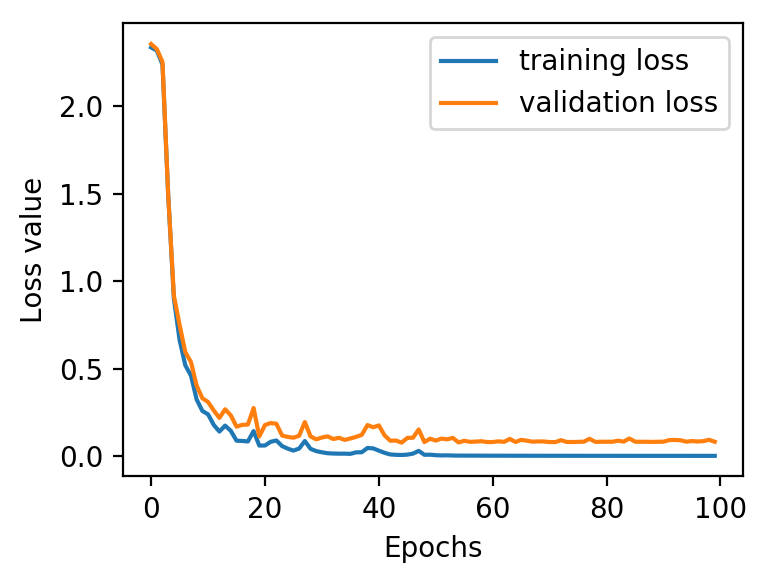

In [26]:
# losses should decrease over time to achieve learning
plt.figure(figsize=(4,3),dpi=200)
plt.plot(trn_loss,label='training loss')
plt.plot(val_loss,label='validation loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss value')

In [20]:
# Check model on the test set images
pred = Model(val_x.as_in_context(device))
predictions = []

# for all the test set data keep their prediction
for p in pred.asnumpy():
    predictions.append(np.argmax(p,axis=0))

In [22]:
from sklearn.metrics import accuracy_score

# compare the prediction data with the prediction targets to see how many correct predictions we have.
# this will prove is our model learns the right way. 
acc = accuracy_score(val_y.asnumpy(),predictions)

print("Correct predictions:",acc*100,"%")

Correct predictions: 97.5 %


## Architecture 1
After 100 epochs:
epoch: 100 | trn_loss: 1.0121 | trn_acc: 62.2962 %| val_loss: 1.0323 | val_acc: 59.8958 %   
Correct predictions: 60.27777777777777 %  

## Architecture 2  
epoch: 100 | trn_loss: 0.2102 | trn_acc: 92.9348 %| val_loss: 0.3460 | val_acc: 88.5417 %  
Correct predictions: 88.61111111111111 %  

Deleting a layer had a positive impact.  

## Architecture 3  
epoch: 100 | trn_loss: 2.3018 | trn_acc: 10.8016 %| val_loss: 2.3085 | val_acc: 7.2917 %  
Correct predictions: 7.5 %

Adding a layer had a negative impact.  

## Architecture 4
epoch: 100 | trn_loss: 0.1347 | trn_acc: 96.1957 %| val_loss: 0.2118 | val_acc: 92.7083 %  
Correct predictions: 92.77777777777779 %  

Comparing to Architecture 2, change of Pooling improved the result.  

## Architecture 5
epoch: 100 | trn_loss: 0.0722 | trn_acc: 97.2826 %| val_loss: 0.1545 | val_acc: 94.5312 %  
Correct predictions: 94.16666666666667 %   

Reducing conv kernel size improved the performance even more.  

## Architecture 6
epoch: 100 | trn_loss: 2.3025 | trn_acc: 10.3261 %| val_loss: 2.3072 | val_acc: 8.5938 %  
Correct predictions: 8.61111111111111 %  

Adding padding to the conv filter worsens a lot the result.  

## Architecture 7  
epoch: 100 | trn_loss: 0.1436 | trn_acc: 94.9728 %| val_loss: 0.2208 | val_acc: 93.7500 %  
Correct predictions: 93.33333333333333 % 

Slightly worse performance than Architecture 5 when changing pooling.  

## Architecture 8  
epoch: 100 | trn_loss: 0.0248 | trn_acc: 99.4565 %| val_loss: 0.1558 | val_acc: 95.8333 %  
Correct predictions: 95.83333333333334 %  

Reducing stride to 1x1 had a positive impact.  

## Architecture 9  
epoch: 100 | trn_loss: 2.3013 | trn_acc: 10.5978 %| val_loss: 2.3135 | val_acc: 8.3333 %  
Correct predictions: 8.055555555555555 %  

This deteriorated the performance, so pooling kernel size 3x3 does not work well.  

## Architecture 10  
epoch: 100 | trn_loss: 2.3022 | trn_acc: 10.5978 %| val_loss: 2.3071 | val_acc: 6.7708 %  
Correct predictions: 6.388888888888888 %  

Even worse, larger pooling kernel size does not work. We should return back to 2x2.  

## Architecture 11  
epoch: 100 | trn_loss: 0.0316 | trn_acc: 99.3207 %| val_loss: 0.0999 | val_acc: 96.3542 %  
Correct predictions: 96.66666666666667 %  

Comparing to architecture 8 (the only difference is the deletion of a Dense layer), the performance improved.  

## Architecture 12
epoch: 100 | trn_loss: 0.1779 | trn_acc: 95.0408 %| val_loss: 0.1938 | val_acc: 94.2708 %  
Correct predictions: 93.88888888888889 %  

Deleting the second dense layer worsened slightly the performance.

## Architecture 13  
epoch: 100 | trn_loss: 0.0001 | trn_acc: 100.0000 %| val_loss: 0.2620 | val_acc: 97.1354 %  
Correct predictions: 97.22222222222221 %  

ReLu instead of sigmoid in both Conv and Dense layers boosted the performance.  

## Architecture 14  
epoch: 100 | trn_loss: 0.0171 | trn_acc: 99.3886 %| val_loss: 0.0321 | val_acc: 98.4375 %  
Correct predictions: 98.33333333333333 %  

Deleting the first dense layer, while keeping ReLu everywhere, helped the performance even more.  

## Architecture 15  
epoch: 100 | trn_loss: 2.3012 | trn_acc: 10.8696 %| val_loss: 2.3128 | val_acc: 7.5521 %  
Correct predictions: 7.777777777777778 %  

Sigmoid for Convolutional layer and ReLu for Dense layers didn't have a good outcome.    

## Architecture 16  
epoch: 100 | trn_loss: 0.0006 | trn_acc: 100.0000 %| val_loss: 0.0439 | val_acc: 98.6979 %  
Correct predictions: 98.61111111111111 %  

The opposite than archtecture 15 (sigmoid for dense layers, ReLu for convolutional resulted in a very good performance.  

## Architecture 17
epoch: 100 | trn_loss: 0.0029 | trn_acc: 100.0000 %| val_loss: 0.0631 | val_acc: 97.3958 %  
Correct predictions: 97.5 %  

Deleting the first dense layer slightly deteriorated the performance.  

## Architecture 18  
epoch: 100 | trn_loss: 0.0003 | trn_acc: 100.0000 %| val_loss: 0.0810 | val_acc: 97.6562 %  
Correct predictions: 97.5 %  

Adding a 4th dense layer, gave almost the same performance as Architecture 17, which had 2 dense layers.  

Architecture 16 has the best score regarding training and test accuracy:  
Sequential(  
  (0): Conv2D(None -> 6, kernel_size=(2, 2), stride=(1, 1), Activation(relu))  
  (1): AvgPool2D(size=(2, 2), stride=(1, 1), padding=(0, 0), ceil_mode=False, global_pool=False, pool_type=avg, layout=NCHW)  
  (2): Dense(None -> 120, Activation(sigmoid))  
  (3): Dense(None -> 84, Activation(sigmoid))  
  (4): Dense(None -> 10, linear)  
)  
